In [1]:
import pandas as pd

In [2]:
df_de = pd.read_csv('../grams/sg_de.csv', names=['frequency', 'word1', 'word2']) # results of skip-grams and 2-grams
df_nl = pd.read_csv('../grams/sg_nl.csv', names=['frequency', 'word1', 'word2']) # results of skip-grams and 2-grams
df_fr = pd.read_csv('../grams/sg_fr.csv', names=['frequency', 'word1', 'word2']) # results of skip-grams and 2-grams
df_es = pd.read_csv('../grams/sg_es.csv', names=['frequency', 'word1', 'word2']) # results of skip-grams and 2-grams

In [3]:
# list of ~94k US babynames to remove (hello, john), (james, bond)
names = pd.read_csv("../names.csv", names=['name'])['name'].tolist()

In [4]:
names = [i for i in names if type(i) == str] #remove non strings

# Filter names and from list

In [5]:
german_filter = ['ich', 'du', 'sie', 'mir', 'wir', 'ihr', 'uns', 'euch', 'die', 'das', 'der', 'den', 'er', 'und', '!', '/', 'ein', 'eine', 'einer', 'einem', 'mein', 'dein', 'nicht', 'wie', 'wo', 'wann', 'was']

In [6]:
dutch_filter = ['ik', 'jij', 'hij', 'zij', 'wij', 'we', 'jullie', 'hun', 'mij', 'me', 'mijn', 'haar', 'hem', '!', '/', 'een', 'de', 'het', 'wie', 'wat', 'waar', 'hoe', 'niet']

In [7]:
french_filter = ['un', 'une', 'le', 'la', '!', '/', 'je', 'tu', 'nous', 'vous']

In [8]:
spanish_filter = ['!', '/', 'el']

In [9]:
l_de = names + german_filter
l_nl = names + dutch_filter
l_fr = names + french_filter
l_es = names + spanish_filter


df_fr.word1 = df_fr.word1.apply(str)
df_fr.word2 = df_fr.word2.apply(str)
df_es.word1 = df_es.word1.apply(str)
df_es.word2 = df_es.word2.apply(str)

In [10]:
df_de = \
    df_de[ \
    ~df_de.word1.isin(l_de) & \
    ~df_de.word2.isin(l_de) & \
    ~df_de.word1.str.isnumeric() & \
    ~df_de.word2.str.isnumeric() &\
    ~(df_de.word1.str == df_de.word2.str)
    ]

df_nl = \
    df_nl[ \
    ~df_nl.word1.isin(l_nl) & \
    ~df_nl.word2.isin(l_nl) & \
    ~df_nl.word1.str.isnumeric() & \
    ~df_nl.word2.str.isnumeric() & \
    ~(df_de.word1.str == df_de.word2.str)
    ]

df_fr = \
    df_fr[ \
    ~df_fr.word1.isin(l_fr) & \
    ~df_fr.word2.isin(l_fr) & \
    ~df_fr.word1.str.isnumeric() & \
    ~df_fr.word2.str.isnumeric() & \
    ~(df_fr.word1.str == df_fr.word2.str)
    ]
    
df_es = \
    df_es[ \
    ~df_es.word1.isin(l_es) & \
    ~df_es.word2.isin(l_es) & \
    ~df_es.word1.str.isnumeric() & \
    ~df_es.word2.str.isnumeric() & \
    ~(df_es.word1.str == df_es.word2.str)
    ]

# Remove words overlapping with other languages

In [11]:
df_de_ex = df_de \
    .merge(df_nl ,left_on=['word1', 'word2'], right_on=['word1', 'word2'], how='left') \
    .merge(df_fr ,left_on=['word1', 'word2'], right_on=['word1', 'word2'], how='left') \
    .merge(df_es ,left_on=['word1', 'word2'], right_on=['word1', 'word2'], how='left')

In [12]:
df_de_ex = df_de_ex.fillna(0)

In [13]:
df_de_ex.columns = ['frequency', 'word1', 'word2', 'nl', 'fr', 'es']

In [14]:
df = df_de_ex[(df_de_ex.nl == 0.0) & (df_de_ex.fr == 0.0) & (df_de_ex.es == 0.0)].drop(['nl', 'fr', 'es'], axis=1)

# Stemming

In [89]:
from nltk.stem.snowball import GermanStemmer
stemmer = GermanStemmer()

In [90]:
df.word1 = df.word1.apply(stemmer.stem)
df.word2 = df.word2.apply(stemmer.stem)

In [91]:
df_stemmed = df.groupby(['word1', 'word2'], as_index=False)['frequency'].sum()

In [92]:
stem_filter = ['$', '*', '%', '..', ":", ";", '=', "\\", "^"]

In [93]:
df_stemmed = df_stemmed[(~df_stemmed.word1.isin(stem_filter)) & (~df_stemmed.word2.isin(stem_filter)) & ~df_stemmed.word1.str.contains(r"(\d)+|^(\?)+") & ~df_stemmed.word2.str.contains(r"(\d)+|^(\?)+")]

/home/emilio/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [94]:
def find(w1, w2):
    return df_stemmed[(df_stemmed.word1 == w1) & (df_stemmed.word2 == w2)]

In [95]:
import matplotlib.pyplot as plt
import numpy as np

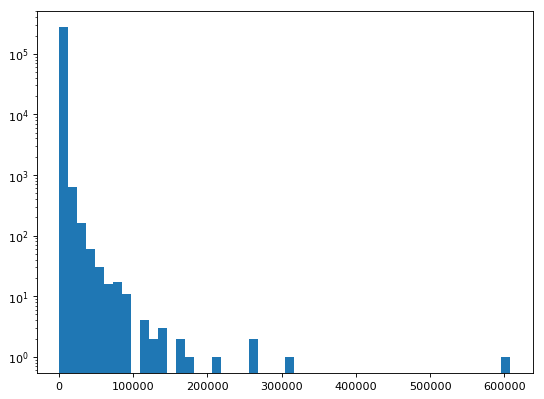

In [102]:
plt.figure(figsize=(8, 6), dpi=80)
h = plt.hist(df.frequency.tolist(), bins=50)
plt.gca().set_yscale("log")
plt.show()